In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
from mlxtend.frequent_patterns import apriori

In [3]:
customer=pd.read_excel(r"C:\Users\Sweta Bisht\OneDrive\Desktop\term2.2_alabs\case_study\4\Datasets\CustomersData.xlsx")
discount=pd.read_csv(r"C:\Users\Sweta Bisht\OneDrive\Desktop\term2.2_alabs\case_study\4\Datasets\Discount_Coupon.csv")
market=pd.read_csv(r"C:\Users\Sweta Bisht\OneDrive\Desktop\term2.2_alabs\case_study\4\Datasets\Marketing_Spend.csv")
sales=pd.read_csv(r"C:\Users\Sweta Bisht\OneDrive\Desktop\term2.2_alabs\case_study\4\Datasets\Online_Sales.csv")
tax=pd.read_excel(r"C:\Users\Sweta Bisht\OneDrive\Desktop\term2.2_alabs\case_study\4\Datasets\Tax_amount.xlsx")

In [4]:
customer.head(3)

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33


In [5]:
discount.columns=discount.columns.str.strip()

In [6]:
market.head(3)

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38


In [7]:
sales.head(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used


In [8]:
tax.head(3)

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18


In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB


In [10]:
discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [11]:
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [12]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [13]:
sales.Transaction_Date=pd.to_datetime(sales.Transaction_Date,format='%Y%m%d')
sales['Month']=sales['Transaction_Date'].dt.strftime('%b')
sales['Year']=sales['Transaction_Date'].dt.year

In [14]:
final=sales.merge(discount,on=['Product_Category','Month'],how='left').merge(tax,on='Product_Category',how='left')
final.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Year,Coupon_Code,Discount_pct,GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,ELEC10,10.0,0.1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,ELEC10,10.0,0.1


In [15]:
final.isna().sum()

CustomerID               0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Month                    0
Year                     0
Coupon_Code            400
Discount_pct           400
GST                      0
dtype: int64

In [16]:
final.Coupon_Code.fillna('NA',inplace=True)
final.Discount_pct.fillna(0,inplace=True)

### 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level
  Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

In [18]:
final.Coupon_Status.unique()

array(['Used', 'Not Used', 'Clicked'], dtype=object)

In [19]:
final.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Year', 'Coupon_Code',
       'Discount_pct', 'GST'],
      dtype='object')

In [20]:
final['invoice']=np.where(final.Coupon_Status=='Used',
                        (( final.Quantity*final.Avg_Price)*(1-(final.Discount_pct/100))*(1+final.GST))+final.Delivery_Charges,
                        (( final.Quantity*final.Avg_Price)*(1+final.GST))+final.Delivery_Charges
                )

### 2. Perform Detailed exploratory analysis

In [22]:
#  Understanding how many customers acquired every month

In [23]:
final.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Year,Coupon_Code,Discount_pct,GST,invoice
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,ELEC10,10.0,0.10,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,ELEC10,10.0,0.10,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2019,OFF10,10.0,0.10,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,2019,SALE10,10.0,0.18,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,2019,AIO10,10.0,0.18,24.0230


In [24]:
custbymonth=final.groupby([final.Transaction_Date.dt.month])[['CustomerID']].nunique()
custbymonth.head()

,CustomerID
Transaction_Date,
1,215
2,109
3,208
4,224
5,200


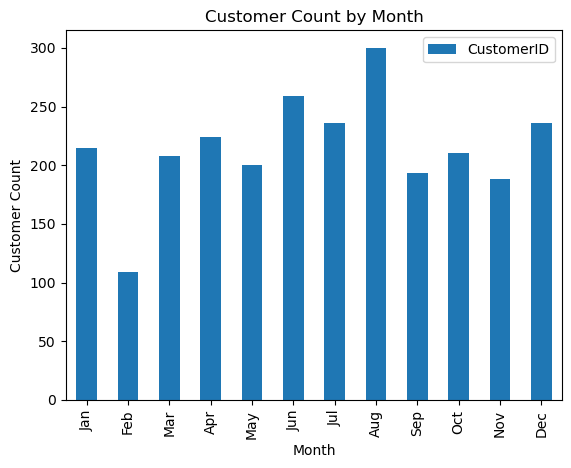

In [25]:
custbymonth.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Customer Count')
plt.title('Customer Count by Month')
plt.xticks(ticks=range(0,12),labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [26]:
cust_transID=final.groupby('CustomerID')[['Transaction_Date']].min()
cust_transID.reset_index(inplace=True)
new_cust_per_month=cust_transID.groupby(cust_transID.Transaction_Date.dt.month)[['CustomerID']].count()
new_cust_per_month.head()

,CustomerID
Transaction_Date,
1,215
2,96
3,177
4,163
5,112


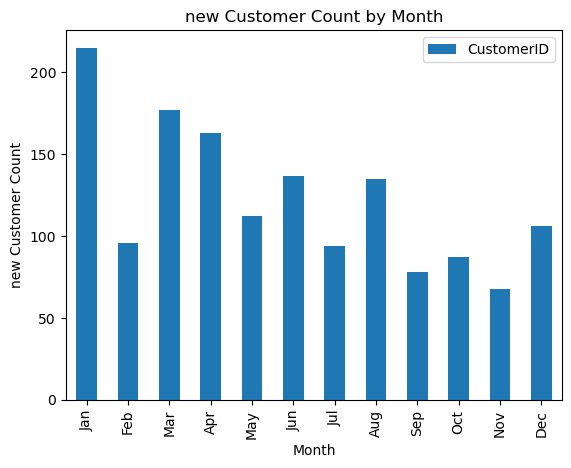

In [27]:
new_cust_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('new Customer Count')
plt.title('new Customer Count by Month')
plt.xticks(ticks=range(0,12),labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [28]:
#  Understand the retention of customers on month on month basis

In [29]:
month_custID=dict()
for i in final['Month'].unique():
    month_custID[i]=final[final['Month']==i]['CustomerID'].unique()

In [30]:
retention=dict()
month=final['Month'].unique()
for i in range(11):
    count=0
    for j in month_custID[month[i+1]]:
        if j in month_custID[month[i]]:
            count+=1
    retention[month[i+1]]=100*count/len(month_custID[month[i]])
            

In [31]:
retention=dict()
retention['jan']=0
month=final['Month'].unique()
for i in range(11):
    count=0
    for j in month_custID[month[i]]:
        if j in month_custID[month[i+1]]:
            count+=1
    # retention[month[i+1]]=100*count/len(month_custID[month[i]])
    retention[month[i+1]]=count

print(retention)

{'jan': 0, 'Feb': 13, 'Mar': 11, 'Apr': 24, 'May': 25, 'Jun': 37, 'Jul': 58, 'Aug': 65, 'Sep': 44, 'Oct': 29, 'Nov': 31, 'Dec': 28}


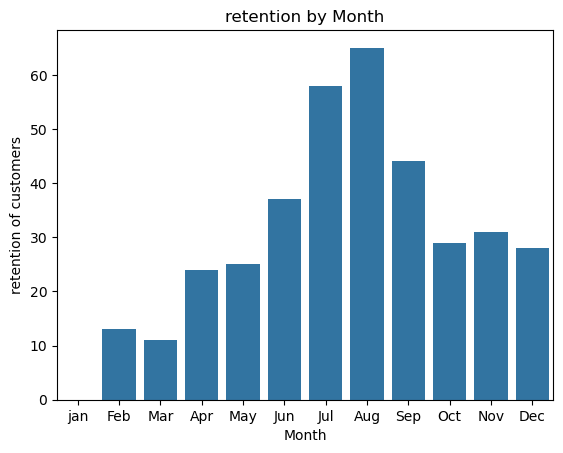

In [32]:
sns.barplot(x=retention.keys(),y=retention.values())
plt.xlabel('Month')
plt.ylabel('retention of customers')
plt.title('retention by Month')
plt.show()

In [33]:
#  How the revenues from existing/new customers on month on month basis

In [34]:
all_cust_month={}
for i in month:
    all_cust_month[i]=final[final['Month']==i]['CustomerID'].unique()

In [35]:
cust_transID['Month']=cust_transID.Transaction_Date.dt.strftime('%b')
curr_cust={}
for i in month:
  curr_cust[i]=cust_transID[cust_transID['Month']==i]['CustomerID'].unique()

In [36]:
exisiting_cust={}
for i in month:
    temp=[]
    for j in all_cust_month[i]:
        if j not in curr_cust[i]:
            temp.append(j)
    exisiting_cust[i]=temp


In [37]:
curr_cust.keys()

dict_keys(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [38]:
curr_revenue={}
exisiting_revenue={}

for month,ids in curr_cust.items():
        curr_revenue[month]=final[(final['CustomerID'].isin(ids)) & (final['Month']==month)]['invoice']
        curr_revenue[month]=curr_revenue[month].sum()

for month,ids in exisiting_cust.items():
        exisiting_revenue[month]=final[(final['CustomerID'].isin(ids)) & (final['Month']==month)]['invoice']
        exisiting_revenue[month]=exisiting_revenue[month].sum()

In [39]:
month

'Dec'

In [40]:
curr_revenue,exisiting_revenue

({'Jan': 494090.5487500001,
  'Feb': 328637.45408000005,
  'Mar': 346227.54936,
  'Apr': 281512.70192,
  'May': 233257.28268,
  'Jun': 217334.50767999998,
  'Jul': 180362.68404000002,
  'Aug': 228883.77692000003,
  'Sep': 162478.53499,
  'Oct': 257474.16682,
  'Nov': 234631.52196000004,
  'Dec': 263414.92764},
 {'Jan': 0.0,
  'Feb': 46524.59322,
  'Mar': 68930.24108,
  'Apr': 195985.8891,
  'May': 132338.74688,
  'Jun': 143665.66661000001,
  'Jul': 271515.72500000003,
  'Aug': 246913.09862,
  'Sep': 234031.95755,
  'Oct': 223293.20299,
  'Nov': 313156.6043,
  'Dec': 292697.36415000004})

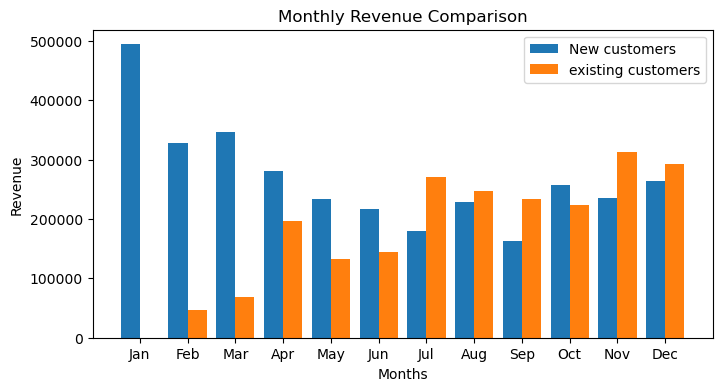

In [41]:
plt.figure(figsize=(8, 4))
x_axis=np.arange(0,12)
month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(x_axis-0.2,curr_revenue.values(),0.4,label='New customers')
plt.bar(x_axis+0.2,exisiting_revenue.values(),0.4,label='existing customers')
plt.xticks(x_axis,month)
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Comparison')
plt.legend()

plt.show()

In [42]:
#  How the discounts playing role in the revenues?

In [43]:
final.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Year', 'Coupon_Code',
       'Discount_pct', 'GST', 'invoice'],
      dtype='object')

In [44]:
coupon_invoice=final.groupby('Coupon_Status')['invoice'].sum()
coupon_invoice

Coupon_Status
Clicked     2.925734e+06
Not Used    8.973176e+05
Used        1.574307e+06
Name: invoice, dtype: float64

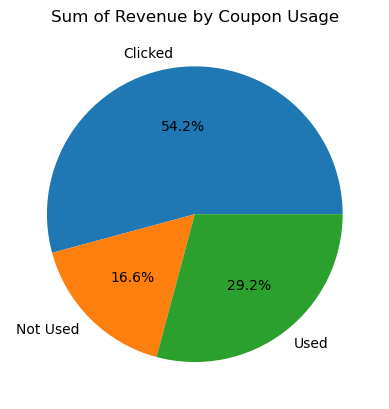

In [45]:
plt.pie(coupon_invoice,labels=coupon_invoice.index,autopct='%1.1f%%')
plt.title('Sum of Revenue by Coupon Usage')
plt.show()

In [46]:
#  Analyse KPI’s like Revenue, number of orders, average order value, number of
# customers (existing/new), quantity, by category, by month, by week, by day etc…

In [47]:
final.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Year', 'Coupon_Code',
       'Discount_pct', 'GST', 'invoice'],
      dtype='object')

In [48]:
final['Day']=final.Transaction_Date.dt.day_name()

In [49]:
final['Week']=final['Transaction_Date'].dt.strftime('%U')

In [50]:
final.groupby('Product_Category').agg({'invoice':'sum','Transaction_ID':'count','Quantity':'sum'})

,invoice,Transaction_ID,Quantity
Product_Category,,,
Accessories,1.019929e+04,234,1097
Android,1.116321e+03,43,45
Apparel,8.278292e+05,18126,32438
Backpacks,1.081288e+04,89,113
Bags,1.936266e+05,1882,15273
Bottles,1.017231e+04,268,2090
Drinkware,2.726220e+05,3483,30501
Fun,8.994542e+03,160,834
Gift Cards,1.944744e+04,159,206


In [51]:
final.groupby('Month').agg({'invoice':'sum','Transaction_ID':'count','Quantity':'sum'})

,invoice,Transaction_ID,Quantity
Month,,,
Apr,477498.59102,4150,25277
Aug,475796.87554,6150,27457
Dec,556112.29179,4502,12667
Feb,375162.04730,3284,16575
Jan,494090.54875,4063,20140
Jul,451878.40904,5251,22898
Jun,361000.17429,4193,21619
Mar,415157.79044,4346,20787
May,365596.02956,4572,18715


In [52]:
final.groupby('Month').agg({'invoice':'sum','Transaction_ID':'count','Quantity':'sum'})

,invoice,Transaction_ID,Quantity
Month,,,
Apr,477498.59102,4150,25277
Aug,475796.87554,6150,27457
Dec,556112.29179,4502,12667
Feb,375162.04730,3284,16575
Jan,494090.54875,4063,20140
Jul,451878.40904,5251,22898
Jun,361000.17429,4193,21619
Mar,415157.79044,4346,20787
May,365596.02956,4572,18715


In [53]:
final.groupby('Day').agg({'invoice':'sum','Transaction_ID':'count','Quantity':'sum'})

,invoice,Transaction_ID,Quantity
Day,,,
Friday,998722.68836,9266,52433
Monday,412681.88924,4464,11983
Saturday,791133.55953,8177,37965
Sunday,813766.51229,8519,40056
Thursday,974511.96144,9000,44482
Tuesday,450233.69110,4611,11317
Wednesday,956308.44438,8887,39797


In [54]:
final.groupby('Week').agg({'invoice':'sum','Transaction_ID':'count','Quantity':'sum'}).head()

,invoice,Transaction_ID,Quantity
Week,,,
00,94214.95841,769,4420
01,104226.96590,838,5195
02,109198.85060,870,4178
03,105101.43654,897,3457
04,113476.50478,958,4298


In [55]:
#  Understand the trends/seasonality of sales by category, location, month etc…

In [56]:
final_customer=final.merge(customer,on='CustomerID',how='left')
final_customer.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Year', 'Coupon_Code',
       'Discount_pct', 'GST', 'invoice', 'Day', 'Week', 'Gender', 'Location',
       'Tenure_Months'],
      dtype='object')

In [57]:
customer.Location.unique()

array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC'],
      dtype=object)

In [58]:
month_cat_revenue=final_customer.groupby(['Month','Product_Category'])[['invoice']].sum().reset_index()
month_cat_revenue.head()

,Month,Product_Category,invoice
0,Apr,Accessories,203.15710
1,Apr,Android,54.77910
2,Apr,Apparel,114793.01718
3,Apr,Backpacks,1292.94400
4,Apr,Bags,14762.73648


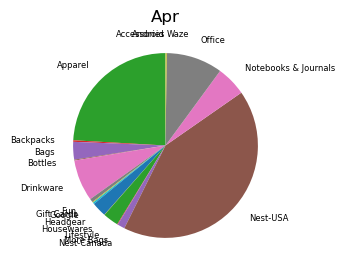

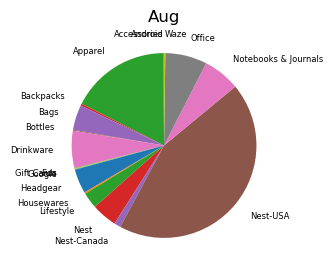

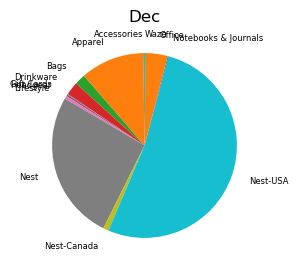

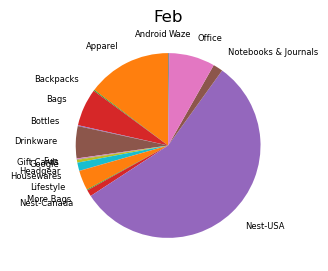

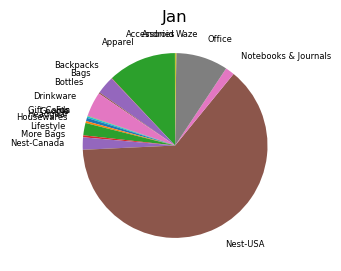

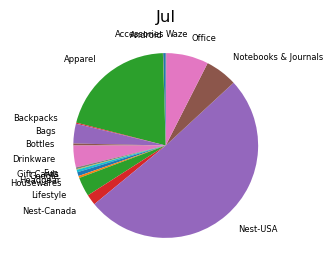

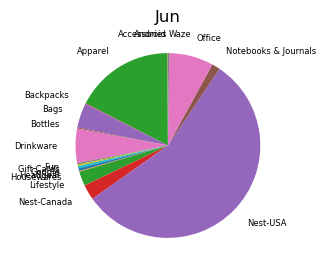

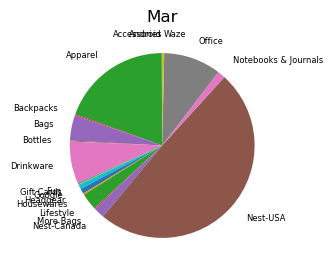

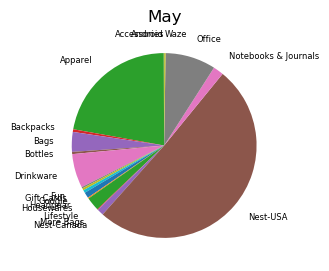

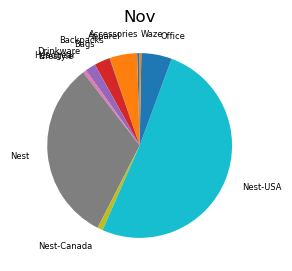

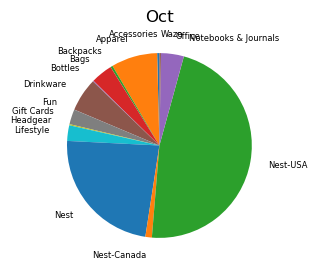

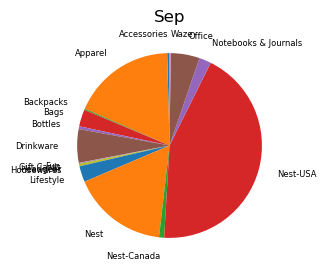

In [59]:
for i in month_cat_revenue.Month.unique():
    df=month_cat_revenue[month_cat_revenue['Month']==i][['Product_Category','invoice']]
    plt.figure(figsize=(5,3))
    plt.pie(df.invoice,labels=df.Product_Category, startangle=90,textprops={'fontsize': 6},labeldistance=1.2)
    plt.title(i)
    plt.show()

In [60]:
#  Calculate the Revenue, Marketing spend, percentage of marketing spend out of
# revenue, Tax, percentage of delivery charges by month.

In [61]:
market['Date']=pd.to_datetime(market['Date'],format='%m/%d/%Y')
market['Month']=market['Date'].dt.strftime('%b')
market['Total_spend']=market.Offline_Spend+market.Online_Spend

In [62]:
x = market.groupby('Month')['Total_spend'].sum().reset_index()
y = final.groupby('Month')['invoice'].sum().reset_index()
z = final.groupby('Month')['Discount_pct'].mean().reset_index()
tax_avg = final.groupby('Month')['GST'].mean().reset_index()
deli_charg = final.groupby('Month')['Delivery_Charges'].sum().reset_index()

result = x.merge(y, on='Month', how='inner')
result = result.merge(z, on='Month', how='inner')
result = result.merge(tax_avg, on='Month', how='inner')
result = result.merge(deli_charg, on='Month', how='inner')

result['market_spend_%'] = (result['Total_spend']*100)/result['invoice']
result['Delivery_Charges_%'] = (result['Delivery_Charges']*100)/result['invoice']

result.head()

,Month,Total_spend,invoice,Discount_pct,GST,Delivery_Charges,market_spend_%,Delivery_Charges_%
0,Apr,157026.83,477498.59102,9.874699,0.142545,41481.74,32.885297,8.687301
1,Aug,142904.15,475796.87554,19.876423,0.148522,61099.57,30.034697,12.841524
2,Dec,198648.75,556112.29179,30.000000,0.121919,37881.99,35.720978,6.811932
3,Feb,137107.92,375162.04730,19.762485,0.136114,49216.60,36.546319,13.118758
4,Jan,154928.95,494090.54875,9.901551,0.131691,59242.32,31.356388,11.990175


In [63]:
#  How marketing spend is impacting on revenue?

In [64]:
correlation=result['Total_spend'].corr(result['invoice'])
print(correlation)
## correlation is >0.5, which means speding and revenue is direclty proportional to each other

0.79628352475623


In [65]:
#  Which product was appeared in the transactions?

In [66]:
final.groupby('Product_Description')[['Transaction_ID']].count().nlargest(n=5,columns='Transaction_ID')

,Transaction_ID
Product_Description,
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,3511
Nest Cam Outdoor Security Camera - USA,3328
Nest Cam Indoor Security Camera - USA,3230
Google Sunglasses,1523
Nest Protect Smoke + CO White Battery Alarm-USA,1361


In [67]:
#  Which product was purchased mostly based on the quantity?

In [68]:
# top 5 most purchased products
final.groupby('Product_Description')[['Quantity']].sum().nlargest(n=5,columns='Quantity')

,Quantity
Product_Description,
Maze Pen,16234
Google 22 oz Water Bottle,14282
Google Sunglasses,11452
Sport Bag,7321
Google Metallic Notebook Set,6496


### 3. Performing Customer Segmentation

In [70]:
#  Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver,
# Standard customers and define strategy on the same.

In [71]:
today=pd.to_datetime(datetime.datetime.today())

In [72]:
cust_segment=final.groupby('CustomerID').agg({'Transaction_Date':lambda x:(today-x.max()).days,'CustomerID':'count','invoice':'mean'})

In [73]:
cust_segment.columns=['recency','frequency','monetary']
cust_segment.head(2)

,recency,frequency,monetary
CustomerID,,,
12346,1978,2,87.490870
12347,1930,60,261.447399


In [74]:
r_t=[0,cust_segment['recency'].quantile(0.25),cust_segment['recency'].quantile(0.50),cust_segment['recency'].quantile(0.75),float('inf')]
f_t=[0,cust_segment['frequency'].quantile(0.25),cust_segment['frequency'].quantile(0.50),cust_segment['frequency'].quantile(0.75),float('inf')]
m_t=[0,cust_segment['monetary'].quantile(0.25),cust_segment['monetary'].quantile(0.50),cust_segment['monetary'].quantile(0.75),float('inf')]
#float('inf') ensures that the highest values are included in the last bin.

In [75]:
cust_segment['r_Segment']=pd.cut(cust_segment['recency'],r_t,labels=False)+1
cust_segment['f_Segment']=pd.cut(cust_segment['frequency'],f_t,labels=False)+1
cust_segment['m_Segment']=pd.cut(cust_segment['monetary'],m_t,labels=False)+1
cust_segment['rfm']=cust_segment['r_Segment'] * 10 + cust_segment['f_Segment'] * 10 + cust_segment['m_Segment']*10

In [76]:
cust_segment['class']=pd.cut(cust_segment['rfm'],4,labels=['Standard','Silver','Gold','Premium'])

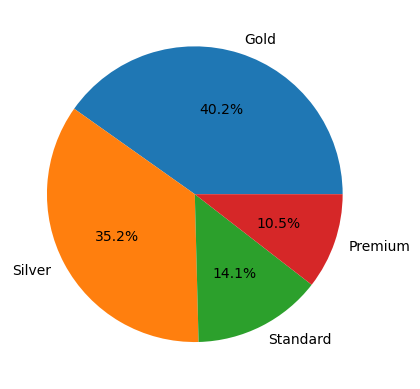

In [77]:
plt.pie(cust_segment['class'].value_counts().values,labels=cust_segment['class'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [78]:
#  Scientific (Using K-Means) & Understand the profiles.

In [79]:
km=KMeans(n_clusters=4,random_state=42)

In [80]:
cust_segment['r_c']=km.fit_predict(cust_segment[['recency']])
cust_segment['f_c']=km.fit_predict(cust_segment[['frequency']])
cust_segment['m_c']=km.fit_predict(cust_segment[['monetary']])

In [81]:
cust_segment['overall_rfm']=cust_segment['r_c']+cust_segment['f_c']+cust_segment['m_c']

In [82]:
cust_segment['overall_rfm'].value_counts()

overall_rfm
3    376
6    254
4    218
2    167
5    142
1    118
0     65
8     52
7     47
9     29
Name: count, dtype: int64

In [83]:
def label_clusters(cluster):
    if cluster in [8,9]:
        return 'Premium'
    elif cluster in [7,6]:
        return 'Gold'
    elif cluster in [5,4,3]:
        return 'Silver'
    else:
        return 'Standard'

In [84]:
cust_segment['km_class']=cust_segment['overall_rfm'].apply(label_clusters)

In [85]:
cust_segment.head()

,recency,frequency,monetary,r_Segment,f_Segment,m_Segment,rfm,class,r_c,f_c,m_c,overall_rfm,km_class
CustomerID,,,,,,,,,,,,,
12346,1978,2,87.490870,2,1,2,50,Standard,2,0,3,5,Silver
12347,1930,60,261.447399,2,4,4,100,Premium,0,3,0,3,Silver
12348,1944,23,73.458954,2,3,2,70,Silver,0,0,1,1,Standard
12350,1888,17,86.319722,1,2,2,50,Standard,0,0,3,3,Silver
12356,1978,36,55.761917,2,3,1,60,Silver,2,0,1,3,Silver


In [86]:
cust_segment['km_class'].value_counts()

km_class
Silver      736
Standard    350
Gold        301
Premium      81
Name: count, dtype: int64

### 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

In [88]:
def segment(cluster):
    if cluster==2:
        return 'high'
    elif cluster==1:
        return 'medium'
    else:
        return 'low'

In [89]:
cust_revenue=final.groupby('CustomerID')[['invoice']].sum()
cust_revenue.reset_index(drop=True,inplace=True)
cust_revenue.head()

,invoice
0,174.98174
1,15686.84396
2,1689.55594
3,1467.43528
4,2007.42900


In [90]:
km1=KMeans(n_clusters=3,random_state=42)

In [91]:
cust_revenue['cluster_revenue']=km1.fit_predict(cust_revenue)

In [92]:
cust_revenue['segment']=cust_revenue['cluster_revenue'].apply(segment)
cust_revenue.head()

,invoice,cluster_revenue,segment
0,174.98174,0,low
1,15686.84396,2,high
2,1689.55594,0,low
3,1467.43528,0,low
4,2007.42900,0,low


In [93]:
cust_segment.head()

,recency,frequency,monetary,r_Segment,f_Segment,m_Segment,rfm,class,r_c,f_c,m_c,overall_rfm,km_class
CustomerID,,,,,,,,,,,,,
12346,1978,2,87.490870,2,1,2,50,Standard,2,0,3,5,Silver
12347,1930,60,261.447399,2,4,4,100,Premium,0,3,0,3,Silver
12348,1944,23,73.458954,2,3,2,70,Silver,0,0,1,1,Standard
12350,1888,17,86.319722,1,2,2,50,Standard,0,0,3,3,Silver
12356,1978,36,55.761917,2,3,1,60,Silver,2,0,1,3,Silver


In [94]:
# #encoding 
# segment_label={'high':2,'medium':1,'low':0}
# cust['CLV_segment_encoded']=cust_revenue['segment'].apply(lambda x:segment_label[x])

In [95]:
cust_segment.columns,customer.columns

(Index(['recency', 'frequency', 'monetary', 'r_Segment', 'f_Segment',
        'm_Segment', 'rfm', 'class', 'r_c', 'f_c', 'm_c', 'overall_rfm',
        'km_class'],
       dtype='object'),
 Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months'], dtype='object'))

In [96]:
clv_df=cust_segment.merge(customer,on='CustomerID',how='left')

In [97]:
clv_df.columns

Index(['CustomerID', 'recency', 'frequency', 'monetary', 'r_Segment',
       'f_Segment', 'm_Segment', 'rfm', 'class', 'r_c', 'f_c', 'm_c',
       'overall_rfm', 'km_class', 'Gender', 'Location', 'Tenure_Months'],
      dtype='object')

In [98]:
clv_df.drop(columns=['CustomerID','r_Segment','f_Segment', 'm_Segment', 'rfm', 'class', 'km_class','Tenure_Months','recency', 'frequency', 'monetary','overall_rfm'],inplace=True)

In [99]:
clv_df=pd.concat([pd.get_dummies(clv_df['Gender'],dtype='int',drop_first=True),pd.get_dummies(clv_df['Location'],dtype='int',drop_first=True),clv_df],axis=1)

In [100]:
clv_df.drop(columns=['Gender','Location'],inplace=True)

In [101]:
clv_df.columns

Index(['M', 'Chicago', 'New Jersey', 'New York', 'Washington DC', 'r_c', 'f_c',
       'm_c'],
      dtype='object')

In [102]:
#splitting data into train and test

In [103]:
x=clv_df
y=cust_revenue['cluster_revenue']

In [104]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

In [105]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1174, 8), (294, 8), (1174,), (294,))

In [106]:
# modelling
xgb_model=xgb.XGBClassifier(max_depth=2)

In [107]:
xgb_model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [108]:
pred_xgb=xgb_model.predict(xtest)

In [109]:
# evaluation: 
accuracy = accuracy_score(ytest, pred_xgb)
classification=classification_report(ytest, pred_xgb)
print('accuracy : ',accuracy)
print(classification)

accuracy :  0.9115646258503401
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       245
           2       0.78      0.65      0.71        49

    accuracy                           0.91       294
   macro avg       0.86      0.81      0.83       294
weighted avg       0.91      0.91      0.91       294



### 5. Cross-Selling (Which products are selling together)

In [111]:
#  You can perform exploratory analysis & market basket analysis to understand which
# of items can be bundled together.

In [112]:
final.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Year', 'Coupon_Code',
       'Discount_pct', 'GST', 'invoice', 'Day', 'Week'],
      dtype='object')

In [113]:
basket=final.groupby(['Transaction_ID','Product_Category'])['Quantity'].sum().unstack().fillna(0)
basket.head()

Product_Category,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Transaction_ID,,,,,,,,,,,,,,,,,,,,
16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16682,0.0,0.0,10.0,0.0,16.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0
16684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0


In [114]:
basket[basket>1]=1

In [115]:
frequent_set=apriori(basket,min_support=0.03,use_colnames=True)

D:\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [116]:
frequent_set['itemsets'].apply(lambda x:list(x))

0                [Apparel]
1                   [Bags]
2              [Drinkware]
3              [Lifestyle]
4                   [Nest]
5               [Nest-USA]
6                 [Office]
7     [Apparel, Drinkware]
8     [Apparel, Lifestyle]
9        [Apparel, Office]
10     [Office, Drinkware]
11     [Lifestyle, Office]
Name: itemsets, dtype: object

### 6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 
days, 60-90 days, 90+ days) .

In [118]:
#  For this, we need create dependent variable at customer level (average days per one
# transaction for only repeat customers and divide into groups 0-30 days, 30-60 days,
# 60-90 days and 90+ days) then build classification model to predict next purchase of
# given customer.

In [119]:
final.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Year', 'Coupon_Code',
       'Discount_pct', 'GST', 'invoice', 'Day', 'Week'],
      dtype='object')

In [120]:
def categorize_days(days):
    if days <= 30:
        return '0-30 days'
    elif days <= 60:
        return '30-60 days'
    elif days <= 90:
        return '60-90 days'
    else:
        return '90+ days'

In [121]:
final = final.sort_values(by=['CustomerID', 'Transaction_Date'])
avg_day=final.groupby('CustomerID')['Transaction_Date'].apply(lambda x:x.diff().mean().days).reset_index()
avg_day.columns=['CustomerID','days_between']
avg_day.head()

,CustomerID,days_between
0,12346,0.0
1,12347,3.0
2,12348,5.0
3,12350,0.0
4,12356,0.0


In [122]:
avg_day.dropna(subset='days_between',inplace=True)

In [123]:
avg_day['category']=avg_day['days_between'].apply(categorize_days)
avg_day.category.value_counts()

category
0-30 days     1385
30-60 days      11
90+ days         5
60-90 days       1
Name: count, dtype: int64

In [124]:
temp=avg_day.merge(cust_segment,on='CustomerID')
temp=temp[['CustomerID','category', 'recency', 'frequency','monetary']]

In [125]:
le=LabelEncoder()

In [126]:
temp['category']=le.fit_transform(temp['category'])

In [127]:
x=temp[['recency', 'frequency','monetary']]
y=temp['category']

In [128]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [129]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((981, 3), (421, 3), (981,), (421,))

In [130]:
model_rfc=RandomForestClassifier()

In [131]:
model_rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [132]:
y_pred_rfc=model_rfc.predict(xtest)

In [133]:
# Evaluate the model
accuracy = accuracy_score(ytest, y_pred_rfc)
classification=classification_report(ytest, y_pred_rfc)
print('accuracy : ',accuracy)
print(classification)

accuracy :  0.9857482185273159
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       415
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2

    accuracy                           0.99       421
   macro avg       0.25      0.25      0.25       421
weighted avg       0.97      0.99      0.98       421



D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 7. Perform cohort analysis by defining below cohortsn?

In [135]:
#  Customers who started in each month and understand their behaviour
#  Which Month cohort has maximum retention?

In [136]:
cohorts = final.groupby('Month')

In [137]:
cohort_metrics = cohorts.agg({
    'CustomerID': 'nunique','invoice': ['count','sum']})
cohort_metrics

CustomerID invoice              
         nunique   count           sum
Month                                 
Apr          224    4150  477498.59102
Aug          300    6150  475796.87554
Dec          236    4502  556112.29179
Feb          109    3284  375162.04730
Jan          215    4063  494090.54875
Jul          236    5251  451878.40904
Jun          259    4193  361000.17429
Mar          208    4346  415157.79044
May          200    4572  365596.02956
Nov          188    3961  547788.12626
Oct          210    4164  480767.36981
Sep          193    4288  396510.49254

In [138]:
cohort_metrics.columns = cohort_metrics.columns
cohort_metrics.columns = ['Unique Customers', 'Total Invoices', 'Total Invoices Amount']
cohort_metrics

,Unique Customers,Total Invoices,Total Invoices Amount
Month,,,
Apr,224,4150,477498.59102
Aug,300,6150,475796.87554
Dec,236,4502,556112.29179
Feb,109,3284,375162.04730
Jan,215,4063,494090.54875
Jul,236,5251,451878.40904
Jun,259,4193,361000.17429
Mar,208,4346,415157.79044
May,200,4572,365596.02956


In [139]:
max_retention_month=[i for i,j in retention.items() if j == max(retention.values())]

In [140]:
print("Cohort Metrics:")
print(cohort_metrics)
print("\nCohort Retention Rates:")
print(retention.items())
print("\nMonth cohort with maximum retention:", max_retention_month[0])

Cohort Metrics:
       Unique Customers  Total Invoices  Total Invoices Amount
Month                                                         
Apr                 224            4150           477498.59102
Aug                 300            6150           475796.87554
Dec                 236            4502           556112.29179
Feb                 109            3284           375162.04730
Jan                 215            4063           494090.54875
Jul                 236            5251           451878.40904
Jun                 259            4193           361000.17429
Mar                 208            4346           415157.79044
May                 200            4572           365596.02956
Nov                 188            3961           547788.12626
Oct                 210            4164           480767.36981
Sep                 193            4288           396510.49254

Cohort Retention Rates:
dict_items([('jan', 0), ('Feb', 13), ('Mar', 11), ('Apr', 24), ('May', 25), (